<a href="https://colab.research.google.com/github/HolyMuchii/ProcesamientoImagenesTPs/blob/main/TP4/TP4_Murilo_Alves_Lima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP 4 - Operaciones de Luminancia
Para este TP se desea que implementen lo siguiente:
* Generar una función que como parámetro de entrada tome la luminacia de una imagen y un numero entero de contadores y como salida obtengamos el histograma respectivo. (la función debe ser desarrollada por ustedes no mediante funciones de librería que ya la implementen). Mostrar el histograma respectivo para 5 valores de contadores diferentes.
* Buscar dos imágenes con problemas de iluminación (una oscura y otra muy brillante, como las mostradas en las filminas de la clase Pag. 7). Verificar la premisa de que al multiplicar la luminancia por un valor alfa, el problema de iluminación no se corrige. Mostrar la imagen original, la resultante y sus respectivos histogramas, para un valor alfa dado.
* Implementar las funciones: Lineal a trozos para un valor Y_min y Y_max como parámetros de la función, raíz cuadrada y potencia cuadrática. Para estas usar las imágenes anteriores y mostrar cómo cambio la imagen y el histograma después de aplicar el filtro a la imagen.

<img src="https://github.com/HolyMuchii/ProcesamientoImagenesTPs/blob/main/IMG_1591.JPG?raw=true" alt="Image01" width=500>
<img src="https://github.com/HolyMuchii/ProcesamientoImagenesTPs/blob/main/IMG_0239.JPG?raw=true" alt="Image01" width=500>

## Importar las imágenes y Establecer los comandos básicos de la operación

In [2]:
!git clone https://github.com/HolyMuchii/ProcesamientoImagenesTPs.git

Cloning into 'ProcesamientoImagenesTPs'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 39 (delta 13), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (39/39), done.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import imageio as io

In [4]:
image1 = io.imread("ProcesamientoImagenesTPs/IMG_1591.JPG")
image2 = io.imread("ProcesamientoImagenesTPs/IMG_0239.JPG")

In [5]:
def image_to_rgb(image):
  r=image[:,:,0]
  g=image[:,:,1]
  b=image[:,:,2]
  return r,g,b

def rgb_to_yiq(r,g,b):
  y = (0.299*r + 0.587*g + 0.114*b)/255
  i = (0.595716*r - 0.274453*g - 0.321263*b)/255
  q = (0.211456*r - 0.522591*g + 0.311135*b)/255
  return y,i,q

def yiq_clip(y,i,q):
  y2 = np.clip(y,0.0,1.0)
  i2 = np.clip(i,-0.5957,0.5957)
  q2 = np.clip(q,-0.5226,0.5226)
  return y2,i2,q2

def yiq_to_rgb(y,i,q):
  r = (y + 0.9663*i + 0.6210*q)*255
  g = (y - 0.2721*i - 0.6474*q)*255
  b = (y - 1.1070*i + 1.7046*q)*255
  return r,g,b

def rgb_clip(r,g,b):
  r2 = np.clip(r,0,255)
  g2 = np.clip(g,0,255)
  b2 = np.clip(b,0,255)
  return r2,g2,b2

def rgb_to_image(r,g,b):
  image=np.zeros((r.shape[0],r.shape[1],3))
  image[:,:,0]=r
  image[:,:,1]=g
  image[:,:,2]=b
  image_int = image.astype(np.uint8)
  return image_int



## Discretizar los componentes de la imagen y Verificar las transformaciones

(3456, 5184, 3) uint8


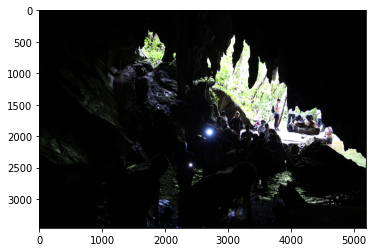

In [12]:
r,g,b = image_to_rgb(image1)
y,i,q = rgb_to_yiq(r,g,b)
y2,i2,q2 = yiq_clip(y,i,q)
r2,g2,b2 = yiq_to_rgb(y2,i2,q2)
r2,g2,b2 = rgb_clip(r2,g2,b2)
imaget = rgb_to_image(r2,g2,b2)
print(imaget.shape,imaget.dtype)
plt.imshow(imaget)

(3456, 5184, 3) uint8


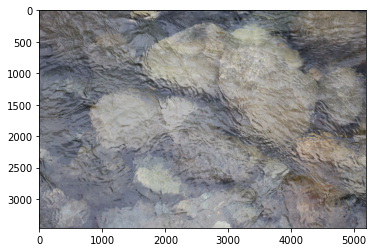

In [9]:
r1,g1,b1 = image_to_rgb(image2)
y1,i1,q1 = rgb_to_yiq(r1,g1,b1)
y12,i12,q12 = yiq_clip(y1,i1,q1)
r12,g12,b12 = yiq_to_rgb(y12,i12,q12)
r12,g12,b12 = rgb_clip(r12,g12,b12)
imaget1 = rgb_to_image(r12,g12,b12)
print(imaget1.shape,imaget1.dtype)
plt.imshow(imaget1)

Text(0, 0.5, 'Número de píxeles')

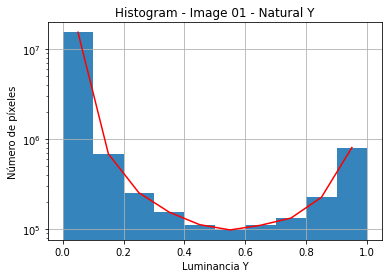

In [13]:
y2.ravel() # Transforma a matrix em um vetor
hist,border = np.histogram(y2.ravel(),10,[0,1])

plt.bar((border[1:]+border[:-1])/2,hist,width=border[1]-border[0], alpha=0.9,log=True)
plt.plot((border[1:]+border[:-1])/2,hist,color="red")
plt.title("Histogram - Image 01 - Natural Y")
plt.grid(True)
plt.xlabel('Luminancia Y')
plt.ylabel('Número de píxeles')

Text(0, 0.5, 'Número de píxeles')

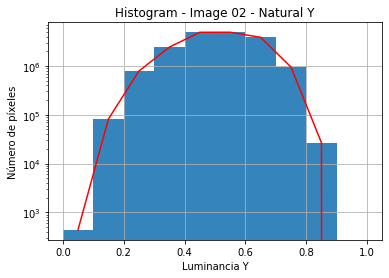

In [14]:
y12.ravel() # Transforma a matrix em um vetor
hist1,border1 = np.histogram(y12.ravel(),10,[0,1])

plt.bar((border1[1:]+border1[:-1])/2,hist1,width=border1[1]-border1[0], alpha=0.9,log=True)
plt.plot((border1[1:]+border1[:-1])/2,hist1,color="red")
plt.title("Histogram - Image 02 - Natural Y")
plt.grid(True)
plt.xlabel('Luminancia Y')
plt.ylabel('Número de píxeles')

## Operaciones de luminancia en la Imagen 01 - Oscuro

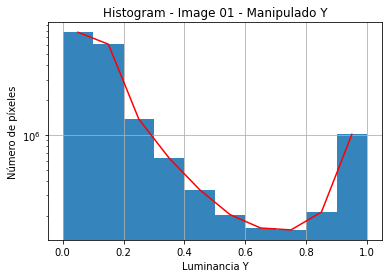

(3456, 5184, 3) uint8


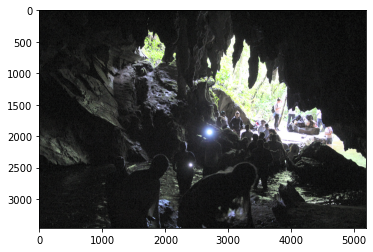

In [93]:
yt=y2
#@title Operaciones de luminancia. { run: "auto" }

# funciones utilizadas
Alpha = 2 #@param {type:"slider", min:1, max:10, step:1}
Root = yt**(1/Alpha)
Linear = Alpha*yt
Potentiation = yt**Alpha
Function  = 'Root' #@param ["Root", "Linear", "Potentiation"]

if Function == 'Root':
  yt1 = Root
elif Function == 'Linear':
  yt1 = Linear
elif Function == 'Potentiation':
  yt1 = Potentiation

# Operación utilizada para establecer los límites
Y_min = 0 #@param {type:"slider", min:0, max:1, step:0.1}
Y_max = 1 #@param {type:"slider", min:0, max:1, step:0.1}
yt2 = np.where(yt1<=Y_min,0,yt1)
yt1 = np.where(yt2>=Y_max,1,yt2)

# Histogram plot
histt,bordert = np.histogram(yt1.ravel(),10,[0,1])
plt.bar((bordert[1:]+bordert[:-1])/2,histt,width=bordert[1]-bordert[0], alpha=0.9,log=True)
plt.plot((bordert[1:]+bordert[:-1])/2,histt,color="red")
plt.title("Histogram - Image 01 - Manipulado Y")
plt.grid(True)
plt.xlabel('Luminancia Y')
plt.ylabel('Número de píxeles')
plt.show()

# Ensamblando la imagen
yt2,it2,qt2 = yiq_clip(yt1,i,q)
rt2,gt2,bt2 = yiq_to_rgb(yt2,it2,qt2)
rt2,gt2,bt2 = rgb_clip(rt2,gt2,bt2)
imagett = rgb_to_image(rt2,gt2,bt2)
print(imagett.shape,imaget.dtype)
plt.imshow(imagett)

## Operaciones de luminancia en la Imagen 02  -  Brillante

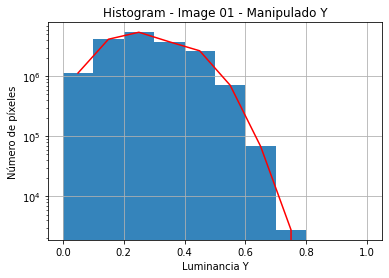

(3456, 5184, 3) uint8


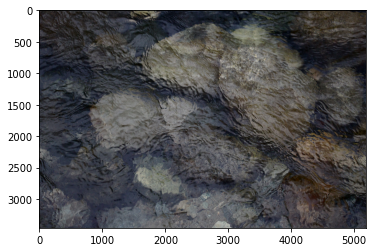

In [92]:
yt=y12
#@title Operaciones de luminancia. { run: "auto" }

# funciones utilizadas
Alpha = 2 #@param {type:"slider", min:1, max:10, step:1}
Root = yt**(1/Alpha)
Linear = Alpha*yt
Potentiation = yt**Alpha
Function = 'Potentiation' #@param ["Root", "Linear", "Potentiation"]

if Function == 'Root':
  yt1 = Root
elif Function == 'Linear':
  yt1 = Linear
elif Function == 'Potentiation':
  yt1 = Potentiation

# Operación utilizada para establecer los límites
Y_min = 0 #@param {type:"slider", min:0, max:1, step:0.1}
Y_max = 1 #@param {type:"slider", min:0, max:1, step:0.1}
yt2 = np.where(yt1<=Y_min,0,yt1)
yt1 = np.where(yt2>=Y_max,1,yt2)

# Histogram plot
histt,bordert = np.histogram(yt1.ravel(),10,[0,1])
plt.bar((bordert[1:]+bordert[:-1])/2,histt,width=bordert[1]-bordert[0], alpha=0.9,log=True)
plt.plot((bordert[1:]+bordert[:-1])/2,histt,color="red")
plt.title("Histogram - Image 01 - Manipulado Y")
plt.grid(True)
plt.xlabel('Luminancia Y')
plt.ylabel('Número de píxeles')
plt.show()

# Ensamblando la imagen
yt12,it12,qt12 = yiq_clip(yt1,i1,q1)
rt12,gt12,bt12 = yiq_to_rgb(yt12,it12,qt12)
rt12,gt12,bt12 = rgb_clip(rt12,gt12,bt12)
imagett1 = rgb_to_image(rt12,gt12,bt12)
print(imagett1.shape,imagett1.dtype)
plt.imshow(imagett1)

## Análisis de Resultados

En general
- Las fórmulas que utilizan un modelo de potencia (exponentes) pueden diferenciar mejor los píxeles de baja luminancia moviendo el histograma a luminancias más altas. El efecto del modelo raíz es el rango del modelo de potencia.
- La fórmula del modelo lineal hace que el gráfico sea más brillante en general, sin agregar mucho a la discretización entre píxeles.

Efecto específico: mejores resultados observados en el método utilizado
- Imagen 01: El modelo de potencia hizo que los contornos de la parte oscura de la cueva fueran más visibles, pero empeoró el efecto de luz de la linterna dentro de la cueva.
- Imagen 02: El modelo de raíz logró eliminar el reflejo blanco en el agua, pero el mayor problema con la nitidez de la imagen se debe a la superficie irregular del agua, lo que hizo que la cámara captara una refracción algo difusa.